In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [8]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


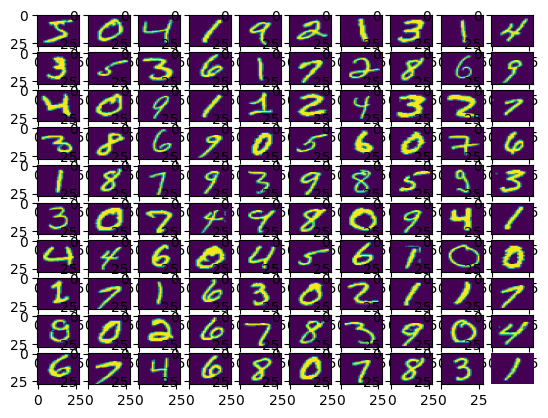

In [10]:
fig, ax = plt.subplots(10, 10)
plt.axis('off')
k = 0
for i in range(10):
	for j in range(10):
		ax[i][j].imshow(x_train[k].reshape(28, 28),
						aspect='auto')
		k += 1
plt.show()

In [12]:
model = Sequential([
	Flatten(input_shape=(28, 28)),

	# dense layer 1
	Dense(256, activation='sigmoid'),

	# dense layer 2
	Dense(128, activation='sigmoid'),

	# output layer
	Dense(10, activation='sigmoid'),
])

In [13]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=10,
		batch_size=2000,
		validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 5s 72ms/step - loss: 2.1630 - accuracy: 0.3511 - val_loss: 1.8577 - val_accuracy: 0.6362
Epoch 2/10
24/24 [==============================] - 1s 57ms/step - loss: 1.5601 - accuracy: 0.6889 - val_loss: 1.2187 - val_accuracy: 0.7763
Epoch 3/10
24/24 [==============================] - 1s 57ms/step - loss: 1.0125 - accuracy: 0.7974 - val_loss: 0.7886 - val_accuracy: 0.8419
Epoch 4/10
24/24 [==============================] - 1s 50ms/step - loss: 0.6960 - accuracy: 0.8472 - val_loss: 0.5675 - val_accuracy: 0.8784
Epoch 5/10
24/24 [==============================] - 1s 48ms/step - loss: 0.5317 - accuracy: 0.8762 - val_loss: 0.4533 - val_accuracy: 0.8937
Epoch 6/10
24/24 [==============================] - 1s 50ms/step - loss: 0.4412 - accuracy: 0.8914 - val_loss: 0.3873 - val_accuracy: 0.9039
Epoch 7/10
24/24 [==============================] - 2s 64ms/step - loss: 0.3862 - accuracy: 0.9006 - val_loss: 0.3450 - val_accuracy: 0.9110
Epoch 8/10
24

In [15]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.2841634154319763, 0.92330002784729]
